# Transporte de Taxis Chicago

## Análisis Exploratorio de Datos

In [1]:
# Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
# Leer los Datasets
taxi_companies = pd.read_csv('/datasets/project_sql_result_01.csv')
dropoff_neighborhoods = pd.read_csv('/datasets/project_sql_result_04.csv')

In [3]:
# Estudiar los datos del df taxi_companies
display(taxi_companies.head())
taxi_companies.info()
duplicados = taxi_companies.duplicated()
print(f'duplicados:{duplicados.sum()}')  



,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
duplicados:0


In [4]:
# Estudiar los datos del df dropoff_neighborhoods
display(dropoff_neighborhoods.head())
dropoff_neighborhoods.info()
duplicados = dropoff_neighborhoods.duplicated()
print(f'duplicados:{duplicados.sum()}')  


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
duplicados:0


* Los datos de los 2 df's tienen los tipos de datos correctos y sin datos nulos


In [5]:
# Identificar los 10 primeros barrios en terminos de finalización del recorrido
top_10_neighborhoods = dropoff_neighborhoods.sort_values(by = 'average_trips', ascending = False).head(10)
display(top_10_neighborhoods)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


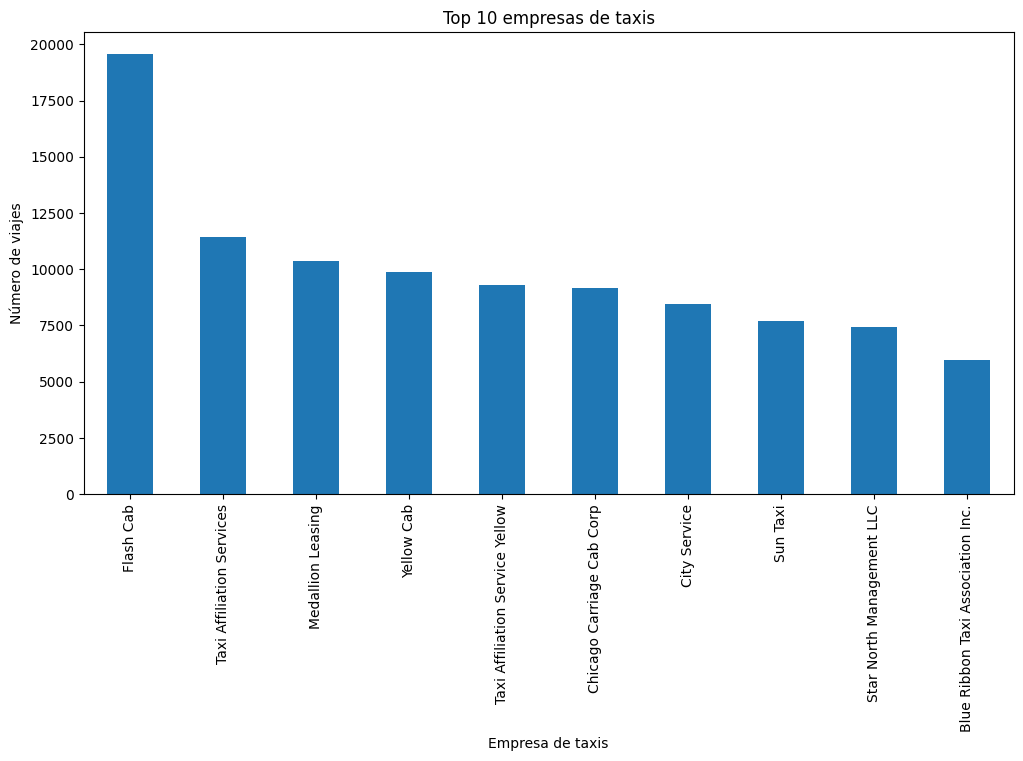

In [6]:
# Hacer gráfico: empresas de taxis y número de viajes 
taxi_sorted = taxi_companies.sort_values(by = 'trips_amount', ascending = False).head(10)
taxi_sorted.plot(x='company_name', y='trips_amount', kind = 'bar', figsize = (12,6), legend = False)
plt.title('Top 10 empresas de taxis')
plt.xlabel('Empresa de taxis')
plt.ylabel('Número de viajes')
plt.xticks(rotation=90)
plt.show()

* Las compañías que realizaron la mayor cantidad de viajes el 15 y 16 de noviembre de 2017 fueron Flash Cab y Taxi Affiliation Services.

* Hay una gran diferencia en la cantidad de viajes entre las principales compañías y el resto.

* Podria indicar una mayor cantidad de taxis disponibles en unas cuantas compañías.

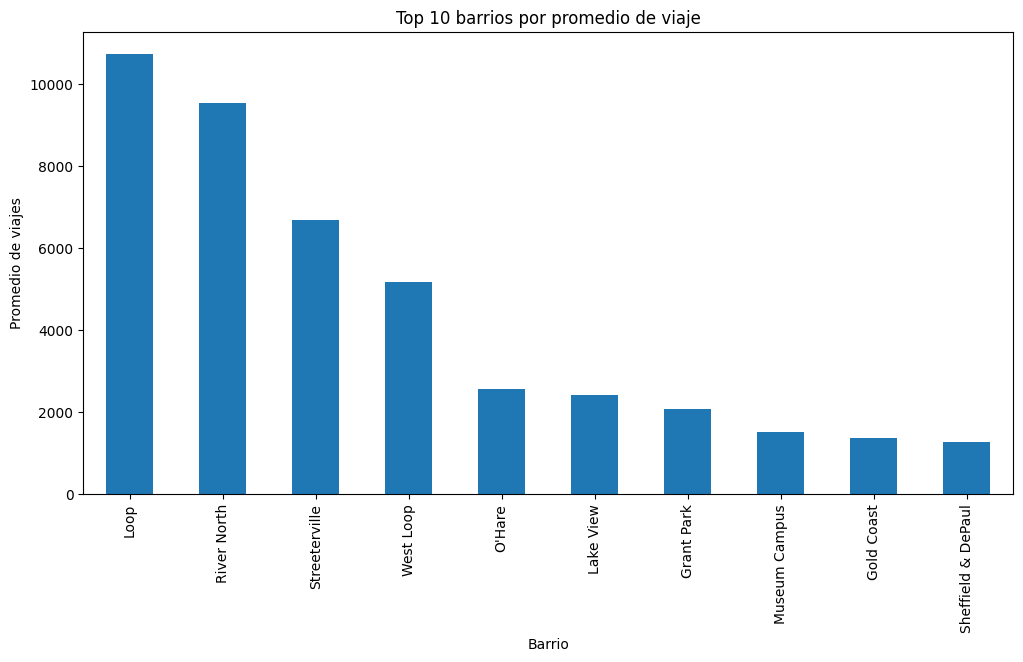

In [7]:
# Hacer gráfico: los 10 barrios principales por número de finalizaciones
top_10_neighborhoods.plot(x='dropoff_location_name', y='average_trips', kind = 'bar', figsize = (12,6), legend = False)
plt.title('Top 10 barrios por promedio de viaje')
plt.xlabel('Barrio')
plt.ylabel('Promedio de viajes')
plt.xticks(rotation=90)
plt.show()

* Los barrios más populares donde terminaron los viajes en noviembre de 2017 fueron Loop, River North, y Streeterville.

* La mayoría de los viajes se concentran en unos pocos barrios, lo que podría indicar zonas de alta actividad comercial o turística.

## Prueba de hipótesis

In [8]:
# Importar datos de viajes
trips_weather = pd.read_csv('/datasets/project_sql_result_07.csv')

In [9]:
# Verificar los datos
display(trips_weather.head())
trips_weather.info()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [10]:
# Convertir columna de tiempo
trips_weather['start_ts'] = pd.to_datetime(trips_weather['start_ts'])

In [11]:
# Crear columna de día de la semana
trips_weather['day_of_week'] = trips_weather['start_ts'].dt.dayofweek

In [12]:
# Filtrar solo los sábados (5 = sábado)
saturdays = trips_weather[trips_weather['day_of_week'] == 5]
display(saturdays)

,start_ts,weather_conditions,duration_seconds,day_of_week
0,2017-11-25 16:00:00,Good,2410.0,5
1,2017-11-25 14:00:00,Good,1920.0,5
2,2017-11-25 12:00:00,Good,1543.0,5
3,2017-11-04 10:00:00,Good,2512.0,5
4,2017-11-11 07:00:00,Good,1440.0,5
...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0,5
1064,2017-11-11 10:00:00,Good,1318.0,5
1065,2017-11-11 13:00:00,Good,2100.0,5
1066,2017-11-11 08:00:00,Good,1380.0,5


In [13]:
# Separar en días lluviosos y no lluviosos
rainy = saturdays[saturdays['weather_conditions'] == 'Bad']
not_rainy = saturdays[saturdays['weather_conditions'] == 'Good']
display(rainy)
display(not_rainy)

,start_ts,weather_conditions,duration_seconds,day_of_week
6,2017-11-04 16:00:00,Bad,2969.0,5
30,2017-11-18 12:00:00,Bad,1980.0,5
34,2017-11-04 17:00:00,Bad,2460.0,5
51,2017-11-04 16:00:00,Bad,2760.0,5
52,2017-11-18 12:00:00,Bad,2460.0,5
...,...,...,...,...
1031,2017-11-18 12:00:00,Bad,2560.0,5
1032,2017-11-18 10:00:00,Bad,1908.0,5
1053,2017-11-18 12:00:00,Bad,2400.0,5
1061,2017-11-18 16:00:00,Bad,2186.0,5


,start_ts,weather_conditions,duration_seconds,day_of_week
0,2017-11-25 16:00:00,Good,2410.0,5
1,2017-11-25 14:00:00,Good,1920.0,5
2,2017-11-25 12:00:00,Good,1543.0,5
3,2017-11-04 10:00:00,Good,2512.0,5
4,2017-11-11 07:00:00,Good,1440.0,5
...,...,...,...,...
1062,2017-11-11 06:00:00,Good,1500.0,5
1063,2017-11-25 11:00:00,Good,0.0,5
1064,2017-11-11 10:00:00,Good,1318.0,5
1065,2017-11-11 13:00:00,Good,2100.0,5


In [14]:
# Prueba de Levene para saber si las varianzas son iguales
alpha = 0.05  # Nivel de significancia 
stat, p_value = stats.levene(rainy['duration_seconds'], not_rainy['duration_seconds'])

# Imprimir valores
print(f'Valor p: {p_value:}')

# Interpretación de resultados
alpha = 0.05
if p_value < alpha:
    print("Se rechaza la hipótesis nula: las varianzas son diferentes.")
else:
    print("No se rechaza la hipótesis nula: las varianzas son iguales.")


Valor p: 0.5332038671974493
No se rechaza la hipótesis nula: las varianzas son iguales.


In [15]:
# Prueba de hipótesis: t-test
alpha = 0.05  # Nivel de significancia 

results = stats.ttest_ind(rainy['duration_seconds'], not_rainy['duration_seconds'], equal_var=True)

# Imprimir valores
print('Valor p:', results.pvalue)

# Interpretación de resultados
if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula: la duración promedio cambia los sábados lluviosos.')
else:
    print('No podemos rechazar la hipótesis nula: la duración promedio no cambia significativamente.')

Valor p: 6.517970327099473e-12
Rechazamos la hipótesis nula: la duración promedio cambia los sábados lluviosos.


Método:
* Se realizó una prueba de hipótesis con el método de la prueba t, debido a que estamos comparando las medias de dos grupos diferentes (días lluviosos vs días no lluviosos) con una significancia del 5% de error la cual es un estándar.

Resultados:
* El valor p obtenido fue un número muy chico lo cúal nos quiere decir que las medias son diferentes.

Conclusión:
* Como el valor p fue menor a 0.05, rechazamos la hipótesis nula. Esto sugiere que la duración de los viajes desde Loop hacia O'Hare sí cambia en los sábados lluviosos.